In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [287]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.armax_model import ARMAXModel
from seminartools.data import read_merged
import numpy as np

# 1. Read data

In [288]:
df_inflation = read_inflation()
df_exog = read_merged()
df_exog.reset_index(inplace = True)
df_exog.rename(columns = {"country" : "Country", "date" : "yearmonth"}, inplace=True)
df_exog

,Country,yearmonth,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


# 2. AR model per country

In [289]:
modelARMA = ARMAXModel()
exogenous_vars = ["gdp_growth", "interest_rate", "unemployment_rate", "commodity_CRUDE_PETRO", "commodity_iNATGAS", "commodity_iAGRICULTURE", "commodity_iMETMIN", "commodity_iPRECIOUSMET"]
modelARMAX = ARMAXModel(exogenous_columns = exogenous_vars)

In [290]:
countries = (df_exog["Country"].unique())
mask = np.logical_not(np.isin(countries,["France", "Germany", "Netherlands", "Belgium"]))
countries = countries[mask]
countries

array(['Japan', 'Canada', 'United States', 'Australia', 'New Zealand',
       'Switzerland', 'Italy', 'Portugal', 'Spain', 'Sweden', 'Denmark',
       'United Kingdom', 'Norway', 'Korea', 'South Africa', 'Türkiye'],
      dtype=object)

In [291]:
df_inflation
df_exog


,Country,yearmonth,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [292]:
from warnings import filterwarnings

select = df_exog.Country.apply(lambda x : x in countries)
dfExogtoUse = df_exog[select].copy()

filterwarnings('ignore')
modelARMA.fit(df_inflation)
modelARMAX.fit(dfExogtoUse)

In [293]:
for country, order in modelARMA.orders.items():
    print(f"Order for {country}: {order}")

Order for Portugal: (2, 1)
Order for New Zealand: (1, 3)
Order for Dominican Republic: (3, 2)
Order for Finland: (3, 3)
Order for Ireland: (3, 3)
Order for Austria: (2, 2)
Order for Japan: (3, 3)
Order for South Africa: (3, 3)
Order for Korea, Rep.: (2, 3)
Order for Fiji: (3, 3)
Order for Paraguay: (1, 1)
Order for Malaysia: (2, 2)
Order for Sweden: (1, 1)
Order for Switzerland: (3, 3)
Order for Thailand: (2, 3)
Order for Cyprus: (3, 3)
Order for Mauritius: (2, 3)
Order for Greece: (2, 3)
Order for France: (2, 2)
Order for Denmark: (2, 3)
Order for Netherlands: (3, 3)
Order for Turkey: (2, 3)
Order for Singapore: (2, 1)
Order for Germany: (3, 3)
Order for Luxembourg: (2, 3)
Order for Guatemala: (1, 3)
Order for Norway: (1, 1)
Order for Belgium: (3, 2)
Order for United States: (1, 3)
Order for Canada: (3, 3)
Order for Italy: (1, 1)
Order for United Kingdom: (2, 3)
Order for Australia: (1, 1)
Order for Spain: (2, 2)
Order for Philippines: (3, 3)


In [294]:
for country, order in modelARMAX.orders.items():
    print(f"Order for {country}: {order}")

Order for Japan: (2, 2)
Order for Canada: (3, 3)
Order for United States: (3, 2)
Order for Australia: (1, 3)
Order for New Zealand: (1, 1)
Order for Switzerland: (2, 0)
Order for Italy: (3, 2)
Order for Portugal: (2, 1)
Order for Spain: (2, 1)
Order for Sweden: (2, 3)
Order for Denmark: (1, 2)
Order for United Kingdom: (2, 1)
Order for Norway: (1, 0)
Order for Korea: (2, 0)
Order for South Africa: (0, 1)
Order for Türkiye: (0, 1)


In [295]:
modelARMA.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                  212
Model:                 ARIMA(3, 0, 3)   Log Likelihood                 789.808
Date:                Wed, 27 Mar 2024   AIC                          -1563.616
Time:                        18:04:28   BIC                          -1536.763
Sample:                    06-30-1970   HQIC                         -1552.762
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.003      2.241      0.025       0.001       0.014
ar.L1         -0.1287      0.165     -0.782      0.434      -0.451       0.194
ar.L2          0.8883      0.043     20.672      0.000       0.804       0.973
ar.L3          0.1833      0.156      1.171      0.241      -0.123       0.490
ma.L1          0.5426      0.145      3.736      0.000       0.258       0.827
ma.L2         -0.5914      0.088     -6.758      0.000      -0.763      -0.420
ma.L3         -0.4978      0.110     -4.506      0.000      -0.714      -0.281
sigma2       3.35e-05   2.33e-06     14.394      0.000    2.89e-05    3.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               184.16
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [296]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 269.121
Date:                Wed, 27 Mar 2024   AIC                           -514.242
Time:                        18:04:34   BIC                           -487.785
Sample:                    06-30-1996   HQIC                          -503.773
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0148      0.009      1.726      0.084      -0.002       0.032
gdp_growth                 0.0009      0.001      1.267      0.205      -0.000       0.002
interest_rate              0.0003      0.001      0.241      0.809      -0.002       0.002
unemployment_rate         -0.0030      0.002     -1.527      0.127      -0.007       0.001
commodity_CRUDE_PETRO      0.0115      0.005      2.432      0.015       0.002       0.021
commodity_iNATGAS         -0.0033      0.004     -0.891      0.373      -0.011       0.004
commodity_iAGRICULTURE     0.0086      0.015      0.595      0.552      -0.020       0.037
commodity_iMETMIN         -0.0201      0.010     -2.100      0.036      -0.039      -0.001
commodity_iPRECIOUSMET    -0.0065      0.009     -0.725      0.468      -0.024       0.011
ar.L1                      0.1709      0.138      1.236      0.216      -0.100       0.442
ar.L2                      0.2452      0.176      1.390      0.164      -0.100       0.591
sigma2                  1.895e-05   4.68e-06      4.051      0.000    9.78e-06    2.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               0.77   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 3. Evaluation

In [297]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

,yearmonth,Country,inflation
0,2023-04-01,Portugal,0.017672
1,2023-04-01,New Zealand,0.013069
2,2023-04-01,Dominican Republic,0.019733
3,2023-04-01,Finland,0.025324
4,2023-04-01,Ireland,0.018154
5,2023-04-01,Austria,0.022065
6,2023-04-01,Japan,0.008785
7,2023-04-01,South Africa,0.017125
8,2023-04-01,"Korea, Rep.",0.008566
9,2023-04-01,Fiji,0.010900


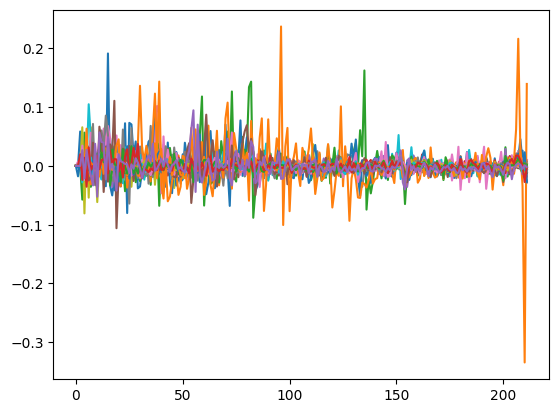

In [298]:
modelARMA.predict(df_inflation)

,yearmonth,Country,inflation
0,2023-04-01,Japan,-0.001390
1,2023-04-01,Canada,0.009475
2,2023-04-01,United States,0.015323
3,2023-04-01,Australia,0.008666
4,2023-04-01,New Zealand,0.002770
5,2023-04-01,Switzerland,-0.001090
6,2023-04-01,Italy,0.007177
7,2023-04-01,Portugal,0.015569
8,2023-04-01,Spain,0.004663
9,2023-04-01,Sweden,0.021885


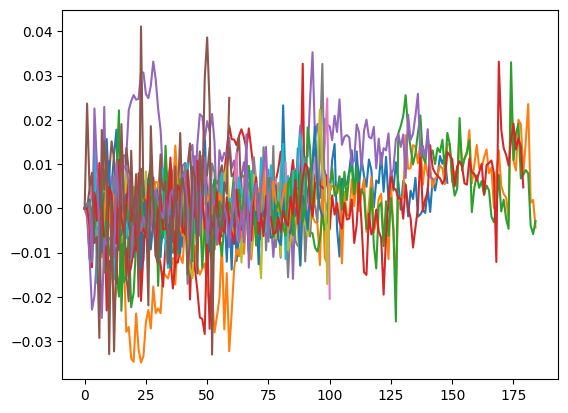

In [299]:
modelARMAX.predict(dfExogtoUse)

# 3.2. Try to make ARMA forecasts

In [300]:
data = dfExogtoUse[dfExogtoUse["Country"] == "Switzerland"]
data

,Country,yearmonth,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
338,Switzerland,1996-04-01,0.000000,-0.263939,1.500000,3.7,-0.045704,-0.094999,0.030666,-0.088572,-0.034433
362,Switzerland,1997-04-01,-0.001095,0.259949,1.000000,4.1,-0.072944,0.083561,-0.035117,-0.000766,-0.036033
392,Switzerland,1998-04-01,0.000000,1.103934,1.000000,3.6,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643
441,Switzerland,1999-04-01,0.002183,0.649858,0.500000,3.1,0.245063,0.185604,-0.026673,0.062249,-0.073526
483,Switzerland,2000-04-01,0.003226,0.462961,3.166667,2.7,0.077511,0.349167,-0.017252,-0.038788,0.002451
...,...,...,...,...,...,...,...,...,...,...,...
2087,Switzerland,2022-01-01,0.007859,-0.061851,-0.750000,4.6,0.542498,0.146272,0.163679,0.210497,0.093645
2106,Switzerland,2022-04-01,0.015595,0.980040,-0.583333,4.1,0.039177,-0.028903,-0.029440,-0.181045,-0.072004
2133,Switzerland,2022-07-01,0.006718,0.245316,0.000000,4.3,-0.244692,0.486523,-0.088860,-0.154988,-0.090042
2145,Switzerland,2022-10-01,-0.000791,-0.026666,0.666667,4.1,-0.115091,-0.355721,-0.016280,0.100554,0.093372


In [301]:
mdl = modelARMAX.models["Switzerland"]
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 269.121
Date:                Wed, 27 Mar 2024   AIC                           -514.242
Time:                        18:06:01   BIC                           -487.785
Sample:                    06-30-1996   HQIC                          -503.773
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0148      0.009      1.726      0.084      -0.002       0.032
gdp_growth                 0.0009      0.001      1.267      0.205      -0.000       0.002
interest_rate              0.0003      0.001      0.241      0.809      -0.002       0.002
unemployment_rate         -0.0030      0.002     -1.527      0.127      -0.007       0.001
commodity_CRUDE_PETRO      0.0115      0.005      2.432      0.015       0.002       0.021
commodity_iNATGAS         -0.0033      0.004     -0.891      0.373      -0.011       0.004
commodity_iAGRICULTURE     0.0086      0.015      0.595      0.552      -0.020       0.037
commodity_iMETMIN         -0.0201      0.010     -2.100      0.036      -0.039      -0.001
commodity_iPRECIOUSMET    -0.0065      0.009     -0.725      0.468      -0.024       0.011
ar.L1                      0.1709      0.138      1.236      0.216      -0.100       0.442
ar.L2                      0.2452      0.176      1.390      0.164      -0.100       0.591
sigma2                  1.895e-05   4.68e-06      4.051      0.000    9.78e-06    2.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               0.77   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

-0.0010900539220584007

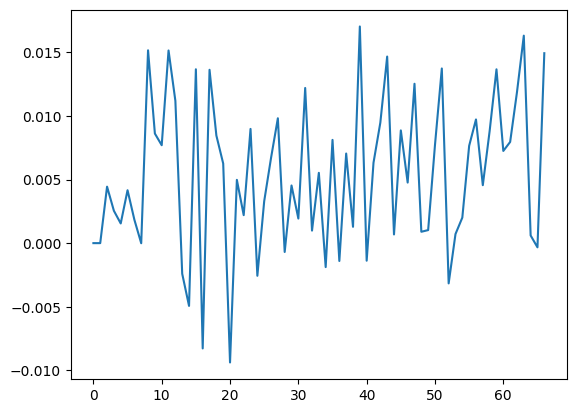

In [302]:
modelARMAX._predict_country(data, "Switzerland")

# 4. H-period ahead forecasting

In [303]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


,yearmonth,Country,inflation
0,2020-01-01,Japan,0.000901
1,2020-01-01,Canada,0.001267
2,2020-01-01,United States,0.006586
3,2020-01-01,Australia,-0.004255
4,2020-01-01,New Zealand,-0.009025
...,...,...,...
203,2020-10-01,United Kingdom,0.002867
204,2023-01-01,Norway,0.001293
205,2023-01-01,Korea,0.004810
206,2023-01-01,South Africa,0.004315


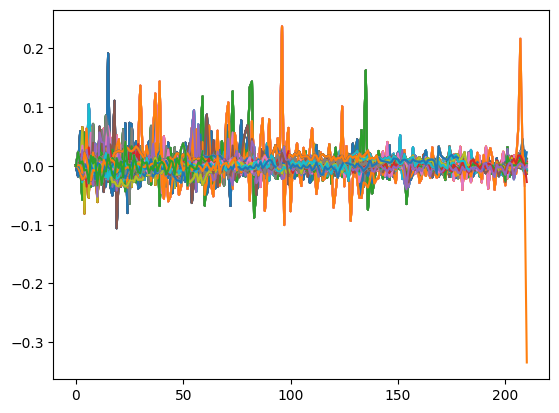

In [238]:
from seminartools.models.utils import h_period_ahead_forecast

forecastARMA = h_period_ahead_forecast(modelARMA, df_inflation, "2020-01-01", h=1)
forecastARMAX = h_period_ahead_forecast(modelARMAX, dfExogtoUse, "2020-01-01", h=1)

forecastARMAX

2020-01-01 00:00:00


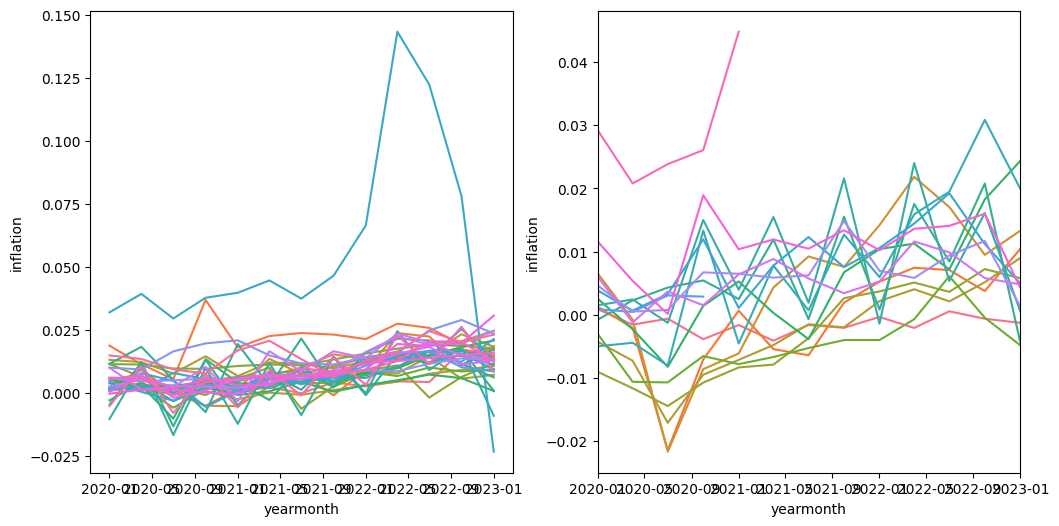

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.lineplot(
    data = forecastARMA,
    x = "yearmonth",
    y = "inflation",
    hue = "Country",
    ax = axes[0]
)
sns.lineplot(
    data = forecastARMAX,
    x = "yearmonth",
    y = "inflation",
    hue = "Country",
    ax = axes[1]
)
print(forecastARMAX['yearmonth'].min())
axes[1].set_xlim(forecastARMA['yearmonth'].min(), forecastARMAX['yearmonth'].max())
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()


In [305]:
modelARMAX.models["Switzerland"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              inflation   No. Observations:                   67
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 269.121
Date:                Wed, 27 Mar 2024   AIC                           -514.242
Time:                        18:06:34   BIC                           -487.785
Sample:                    06-30-1996   HQIC                          -503.773
                         - 03-31-2023                                         
Covariance Type:                  opg                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0148      0.009      1.726      0.084      -0.002       0.032
gdp_growth                 0.0009      0.001      1.267      0.205      -0.000       0.002
interest_rate              0.0003      0.001      0.241      0.809      -0.002       0.002
unemployment_rate         -0.0030      0.002     -1.527      0.127      -0.007       0.001
commodity_CRUDE_PETRO      0.0115      0.005      2.432      0.015       0.002       0.021
commodity_iNATGAS         -0.0033      0.004     -0.891      0.373      -0.011       0.004
commodity_iAGRICULTURE     0.0086      0.015      0.595      0.552      -0.020       0.037
commodity_iMETMIN         -0.0201      0.010     -2.100      0.036      -0.039      -0.001
commodity_iPRECIOUSMET    -0.0065      0.009     -0.725      0.468      -0.024       0.011
ar.L1                      0.1709      0.138      1.236      0.216      -0.100       0.442
ar.L2                      0.2452      0.176      1.390      0.164      -0.100       0.591
sigma2                  1.895e-05   4.68e-06      4.051      0.000    9.78e-06    2.81e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.72   Prob(JB):                         0.12
Heteroskedasticity (H):               0.77   Skew:                            -0.61
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. Compare the forecast with the actual data

In [316]:
forecast_mergedARMA = forecastARMA.copy().rename(columns={"inflation": "pred"})
forecast_mergedARMA = forecast_mergedARMA.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMA.tail(100)

,yearmonth,Country,pred,actual
355,2022-07-01,Austria,0.015154,0.026846
356,2022-07-01,Japan,0.007715,0.010628
357,2022-07-01,South Africa,0.012315,0.027957
358,2022-07-01,"Korea, Rep.",0.014474,0.011352
359,2022-07-01,Fiji,-0.001757,0.007368
...,...,...,...,...
450,2023-01-01,Italy,0.030757,0.003938
451,2023-01-01,United Kingdom,0.012617,0.008814
452,2023-01-01,Australia,0.016027,0.013756
453,2023-01-01,Spain,0.008592,0.006013


In [307]:
forecast_mergedARMAX = forecastARMAX.copy().rename(columns={"inflation": "pred"})
forecast_mergedARMAX = forecast_mergedARMAX.merge(
    dfExogtoUse[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_mergedARMAX.tail(100)

,yearmonth,Country,pred,actual
108,2021-07-01,Norway,0.006243,0.014192
109,2021-07-01,Korea,0.005744,0.006862
110,2021-07-01,South Africa,0.010463,0.016055
111,2021-01-01,Türkiye,0.044827,NaN
112,2021-10-01,Japan,-0.002064,0.001969
...,...,...,...,...
203,2020-10-01,United Kingdom,0.002867,NaN
204,2023-01-01,Norway,0.001293,0.006886
205,2023-01-01,Korea,0.004810,0.010538
206,2023-01-01,South Africa,0.004315,0.011202


In [308]:
#drop those rows for which the actual inflation data is missing
forecast_mergedARMAX.dropna(inplace=True)
forecast_mergedARMA.dropna(inplace = True)

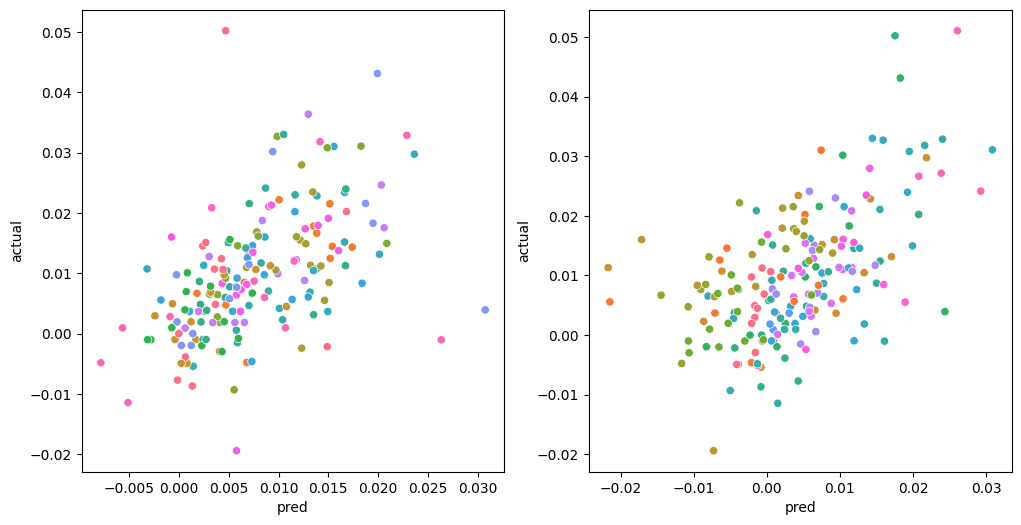

In [320]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
sns.scatterplot(
    data = forecast_mergedARMA,
    x = "pred",
    y = "actual",
    hue = "Country",
    ax=axes[0],
)
sns.scatterplot(
    data = forecast_mergedARMAX,
    x = "pred",
    y = "actual",
    hue = "Country",
    ax = axes[1],
)
# turn off legend
axes[0].legend().remove()
axes[1].legend().remove()

In [310]:
import statsmodels.api as sm
#for the ARMA model

sm.OLS(
    forecast_mergedARMA["actual"], sm.add_constant(forecast_mergedARMA["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     76.71
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           3.98e-17
Time:                        18:06:54   Log-Likelihood:                 1088.4
No. Observations:                 455   AIC:                            -2173.
Df Residuals:                     453   BIC:                            -2165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.001      3.321      0.001       0.002       0.007
pred           0.7176      0.082      8.758      0.000       0.557       0.879
==============================================================================
Omnibus:                      457.573   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266788.566
Skew:                          -3.391   Prob(JB):                         0.00
Kurtosis:                     121.433   Cond. No.                         78.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
#for the ARMAX model
sm.OLS(
    forecast_mergedARMAX["actual"], sm.add_constant(forecast_mergedARMAX["pred"])
).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     87.26
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           2.88e-17
Time:                        18:06:58   Log-Likelihood:                 625.97
No. Observations:                 189   AIC:                            -1248.
Df Residuals:                     187   BIC:                            -1241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0071      0.001     10.042      0.000       0.006       0.009
pred           0.6637      0.071      9.341      0.000       0.524       0.804
==============================================================================
Omnibus:                        8.371   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.551
Skew:                           0.420   Prob(JB):                       0.0139
Kurtosis:                       3.616   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
#take only those countries for the arma model that are also in armax model to get a good comparison
mask = forecast_mergedARMA.Country.apply(lambda x : x in countries)
forecast_mergedARMA = forecast_mergedARMA[mask]
forecast_mergedARMA

,yearmonth,Country,pred,actual
0,2020-01-01,Portugal,0.001340,-0.008679
1,2020-01-01,New Zealand,0.005643,0.007664
6,2020-01-01,Japan,0.001683,-0.000978
7,2020-01-01,South Africa,0.013215,0.011336
12,2020-01-01,Sweden,0.005533,-0.009302
...,...,...,...,...
449,2023-01-01,Canada,0.012988,0.006080
450,2023-01-01,Italy,0.030757,0.003938
451,2023-01-01,United Kingdom,0.012617,0.008814
452,2023-01-01,Australia,0.016027,0.013756


In [319]:
#mspes
E = forecast_mergedARMAX.pred - forecast_mergedARMAX.actual
SPE = E**2
SSPE= sum(SPE)
MSPE = SSPE/len(forecast_mergedARMA)
MSPE_arma = np.sum((forecast_mergedARMA.pred - forecast_mergedARMA.actual)**2)/len(forecast_mergedARMA)
MSPE_armaX = np.sum((forecast_mergedARMAX.pred - forecast_mergedARMAX.actual)**2)/len(forecast_mergedARMAX)
print("MSPE of ARMA model is: " + str(MSPE_arma))
print("MSPE of ARMAX model is: " + str(MSPE_armaX))

MSPE of ARMA model is: 8.4260275181527e-05
MSPE of ARMAX model is: 0.00011983318727556763


(array([ 3.,  5., 12., 26., 43., 36., 44., 12.,  6.,  2.]),
 array([-0.03312413, -0.02776881, -0.0224135 , -0.01705818, -0.01170287,
        -0.00634755, -0.00099224,  0.00436308,  0.00971839,  0.01507371,
         0.02042903]),
 <BarContainer object of 10 artists>)

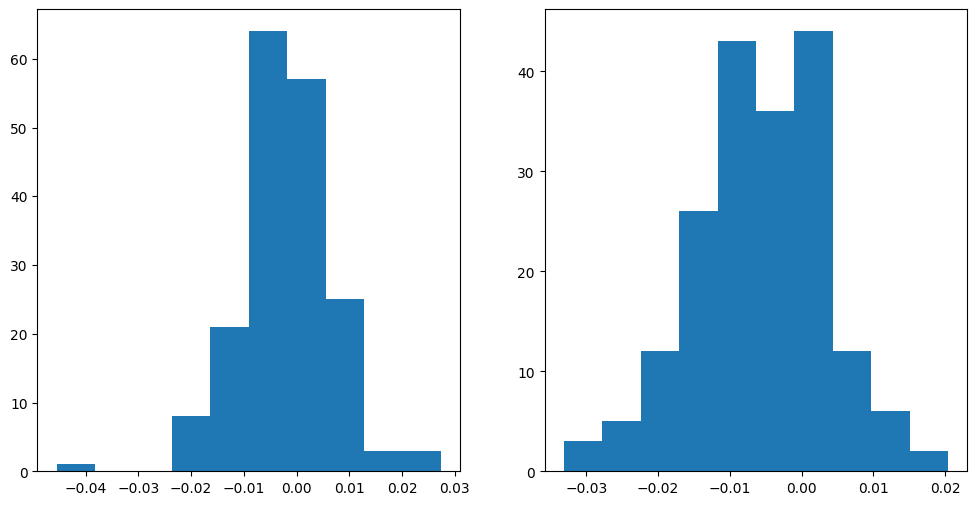

In [286]:
E_ARMAX = forecast_mergedARMAX.pred - forecast_mergedARMAX.actual
E_ARMA = forecast_mergedARMA.pred - forecast_mergedARMA.actual
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
axes[0].hist(
    x = E_ARMA,
    bins = 10,
)
axes[1].hist(
    x = E_ARMAX,
    bins = 10,
)

